In [32]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

## 骰子问题

假设我有一盒骰子，里面有 4 面的骰子、 6 面的骰子、 8 面的骰子、 12 面的骰子和 20面的骰子各 1 个。

假如我随机从盒子中选一个骰子，转动它得到了 6 。那么每一个骰子被选中的概率是多少？

In [33]:
from codeLib.thinkbayes import Suite

In [34]:
class Dice(Suite):
    """Represents hypotheses about which die was rolled."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer number of sides on the die
        data: integer die roll
        """
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [35]:
# 主函数

suite = Dice([4, 6, 8, 12, 20])

print('各种骰子的先验概率:')
suite.Print()

suite.Update(6)  # 转动得到6
print('\n选了一个骰子，转动得到6，后验概率:')
suite.Print()

print('\n继续转动依次得到[4, 8, 7, 7, 2]，则后验概率:')
for roll in [4, 8, 7, 7, 2]:
    suite.Update(roll)
suite.Print()

各种骰子的先验概率:
[ 4 ] : 20.000000 %
[ 6 ] : 20.000000 %
[ 8 ] : 20.000000 %
[ 12 ] : 20.000000 %
[ 20 ] : 20.000000 %

选了一个骰子，转动得到6，后验概率:
[ 4 ] : 0.000000 %
[ 6 ] : 39.215686 %
[ 8 ] : 29.411765 %
[ 12 ] : 19.607843 %
[ 20 ] : 11.764706 %

继续转动依次得到[4, 8, 7, 7, 2]，则后验概率:
[ 4 ] : 0.000000 %
[ 6 ] : 0.000000 %
[ 8 ] : 91.584527 %
[ 12 ] : 8.040343 %
[ 20 ] : 0.375130 %


## 火车头问题



In [36]:
class Train(Dice):
    """Represents hypotheses about how many trains the company has.

    The likelihood function for the train problem is the same as
    for the Dice problem.
    """
    
    def getHypos_Probability(self):
        """
        author       : Human7
        description  : 将假设和对应的概率转换成列表，为了好画图
        """
        li_Hypos = []  # 火车数量
        li_Pro   = []  # 先验概率
        for hypo, pro in suite.Items():
            li_Hypos.append(hypo)
            li_Pro.append(pro)
        
        return li_Hypos,li_Pro
    
    
    def findMaxPro(self):
        """
        author      : Human7
        description : 寻找概率最大的火车头数量，及其概率
        """
        proMax = 0
        keyMax = None
        for key, pro in self.Items():
            if pro > proMax:
                proMax = pro
                keyMax = key
        
        return keyMax, proMax
    
        

后验概率的平均值:  333.41989326371095
火车头数量是: 60 的时候概率最大, 概率为：0.590542%


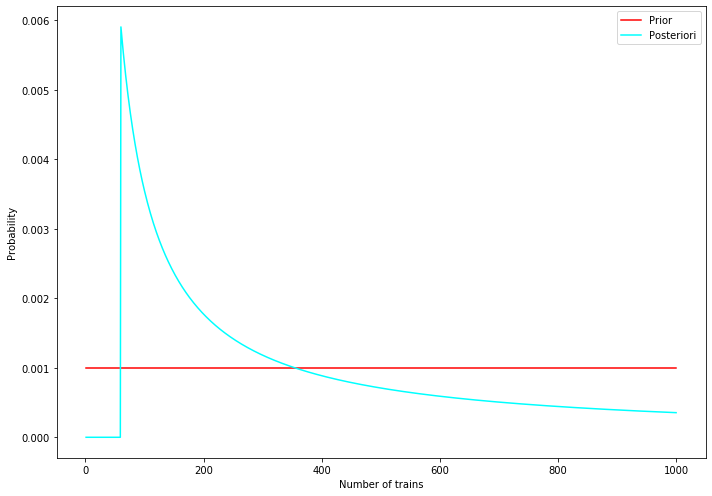

In [37]:
# 主函数

hypos = range(1, 1001)
suite = Train(hypos)

priorTrainNum = []  # 火车数量
priorPro      = []  # 先验概率
postTrainNum  = []  # 火车数量
postPro       = []  # 后验概率 Posterior

priorTrainNum, priorPro = suite.getHypos_Probability()  # 获得先验假设及其概率
    
suite.Update(60)

postTrainNum, postPro = suite.getHypos_Probability()  # 获得后验假设及其概率

print('后验概率的平均值: ',suite.Mean())

keyMax, proMax = suite.findMaxPro()
print('火车头数量是:',keyMax, '的时候概率最大, 概率为：%f%%'%(proMax*100) )


    

# ==========================
#          画图
# ==========================
import numpy as np
figsize(10, 7)

fig, ax1 = plt.subplots()

color = 'red'

ax1.plot(priorTrainNum, priorPro, color=color)  # 先验概率 曲线
ax1.plot(postTrainNum, postPro, color='aqua')   # 后验概率 曲线

ax1.set_xlabel('Number of trains')  # x轴
ax1.set_ylabel('Probability')       # 先验概率的ax


ax1.legend(["Prior","Posteriori"])

fig.tight_layout()  # 保证图像被完整显示



## 怎样看待先验概率？

对比发现对先验概率很敏感，分别对火车头数量N=500,1000,2000进行模拟，发现对于后验概率影响很大。这个时候如果有更多的数据（观察数据），后验概率基于相同。

有了更多的数据后，基于不同的先验概率，后验分布趋于收敛。例如，假设除了列车 60 我们也看到列车 30 和 90。我们可以这样更新分布。

当观察数据为 ： [30, 60, 90] ，后验数据趋于一致
---------------------------------------------------
火车头N假设为 500 时，后验平均值为: 151.849588
火车头N假设为 1000 时，后验平均值为: 164.305586
火车头N假设为 2000 时，后验平均值为: 171.338181


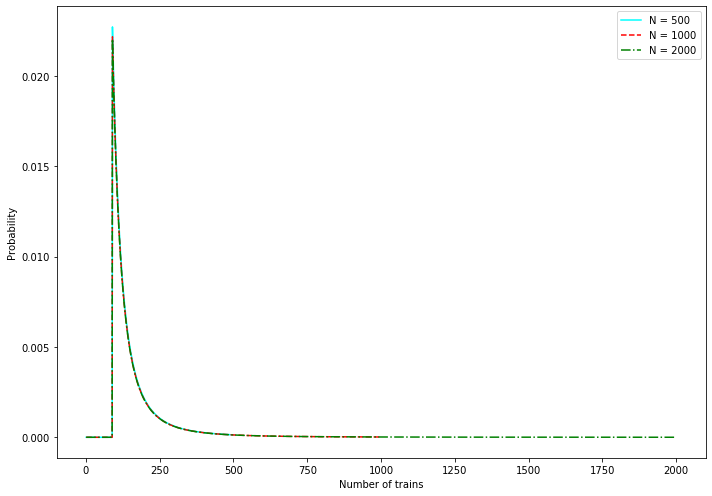

In [38]:
dataset = [30, 60, 90]        # 观察值
highNum = [500, 1000, 2000]  # 火车数量，影响先验概率


li_suite = []
li_means = []
li_hypos = []
li_proba = []

for high in highNum:
    # 每一种火车头数量 进行一次计算
    hypos = []
    proba = []
    hypos = range(1, high+1)
    suite = Train(hypos)
    for data in dataset:
        suite.Update(data)  # 根据观察数据，得到后验概率
    li_suite.append(suite)
    
    hypos, proba = suite.getHypos_Probability()
    li_hypos.append(hypos)
    li_proba.append(proba)
    
    # 计算每一种火车头数量的后验平均值
    li_means.append(suite.Mean())
    

# -------------------
# 输出

print("当观察数据为 ：",str(dataset), "，后验数据趋于一致")
print('---------------------------------------------------')
li_legend = []  # 画图的图例
for i,mean in enumerate(li_means):
    strShow = "火车头N假设为 %d 时，后验平均值为: %f"%(highNum[i], mean)
    print(strShow)
    strShow = "N = %d"%(highNum[i])
    li_legend.append(strShow)

# -------------------
# 画图
figsize(10, 7)

color_s     = [ 'cyan','red','green','black','blue','magenta']  # 颜色
linestyle_s = [ '-',  # solid line style
                '--', # dashed line style
                '-.', # dash-dot line style
                ':' ]  # dotted line style

marker_s    = [ '.', ',', 'o','v','^', '<', '>','1','2','3','4','s','p','*']  # 标记

fig, ax1 = plt.subplots()


for i,hypo in enumerate(li_hypos):
    proba = li_proba[i]
    ax1.plot( hypo, proba, color=color_s[i],linestyle=linestyle_s[i] )   # 后验概率 曲线

    
ax1.set_xlabel('Number of trains')  # x轴
ax1.set_ylabel('Probability')       # 概率的ax



ax1.legend(li_legend)

fig.tight_layout()  # 保证图像被完整显示



## 其他先验概率

In [39]:
from codeLib.thinkbayes import Pmf
class Train2(Train):
    """Represents hypotheses about how many trains the company has."""
    # 本来要继承Dice类，不过要用到Train的函数
    
    def __init__(self, hypos, alpha=1.0):
        """Initializes the hypotheses with a power law distribution.

        hypos: sequence of hypotheses
        alpha: parameter of the power law prior
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()


### 对比不同上限下使用幂律分布作为先验概率

事实上，考虑一个任意大的上界，平均值都收敛于 134。所以基于幂律分布的先验概率是比较现实的，因为它基于公司规模的一般情况，并且在实际中表现得更好。

使用幂律分布的先验进行试验
当观察数据为 ： [30, 60, 90] ，后验数据趋于一致
---------------------------------------------------
火车头N假设为 500 时，后验平均值为: 130.708470
火车头N假设为 1000 时，后验平均值为: 133.275231
火车头N假设为 2000 时，后验平均值为: 133.997463


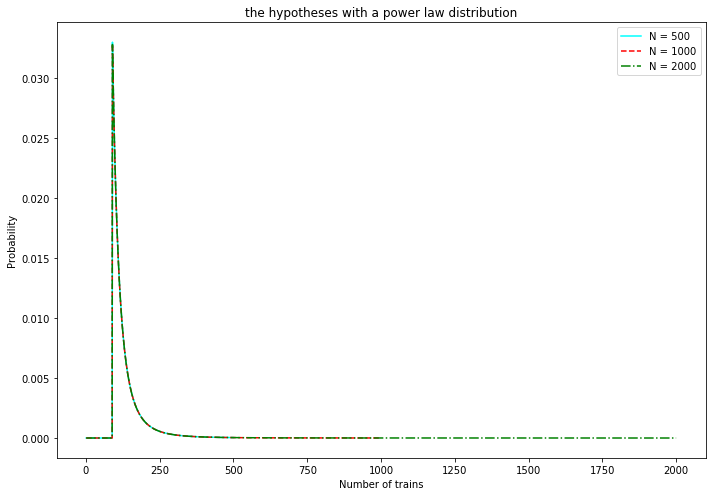

In [40]:
dataset = [30, 60, 90]        # 观察值
highNum = [500, 1000, 2000]  # 火车数量，影响先验概率


li_suite = []
li_means = []
li_hypos = []
li_proba = []

for high in highNum:
    # 每一种火车头数量 进行一次计算
    hypos = []
    proba = []
    hypos = range(1, high+1)
    suite = Train2(hypos)
    for data in dataset:
        suite.Update(data)  # 根据观察数据，得到后验概率
    li_suite.append(suite)
    
    hypos, proba = suite.getHypos_Probability()
    li_hypos.append(hypos)
    li_proba.append(proba)
    
    # 计算每一种火车头数量的后验平均值
    li_means.append(suite.Mean())
    

# -------------------
# 输出

print('使用幂律分布的先验进行试验')
print("当观察数据为 ：",str(dataset), "，后验数据趋于一致")
print('---------------------------------------------------')
li_legend = []  # 画图的图例
for i,mean in enumerate(li_means):
    strShow = "火车头N假设为 %d 时，后验平均值为: %f"%(highNum[i], mean)
    print(strShow)
    strShow = "N = %d"%(highNum[i])
    li_legend.append(strShow)

# -------------------
# 画图
figsize(10, 7)



fig, ax1 = plt.subplots()


for i,hypo in enumerate(li_hypos):
    proba = li_proba[i]
    ax1.plot( hypo, proba, color=color_s[i],linestyle=linestyle_s[i] )   # 后验概率 曲线


ax1.set_title('the hypotheses with a power law distribution')  # 使用幂律分布作为先验概率
ax1.set_xlabel('Number of trains')  # x轴
ax1.set_ylabel('Probability')       # 概率的ax



ax1.legend(li_legend)

fig.tight_layout()  # 保证图像被完整显示


### 对比使用幂律和基于均匀随机分布的先验概率

观察值只有数字为60的火车头
均匀随机分布作为先验概率，后验概率的平均值为: 333.419893
幂律分布作为先验概率，后验概率的平均值为: 178.547353


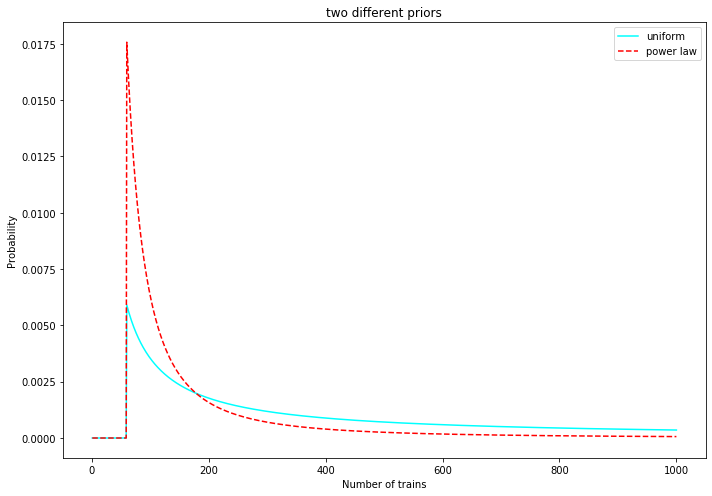

In [41]:
# dataset = [30, 60, 90]        # 观察值
dataset = [60]        # 观察值
high = 1000  # 火车数量，影响先验概率

li_Class = [Train, Train2]  # 两种不同先验分布，影响先验概率
#li_suite = []
li_means = []
li_hypos = []
li_proba = []

for tClass in li_Class:
    # 每一种火车头数量 进行一次计算
    hypos = []
    proba = []
    hypos = range(1, high+1)    
    suite = tClass(hypos)
    for data in dataset:
        suite.Update(data)  # 根据观察数据，得到后验概率
    #li_suite.append(suite)
    
    hypos, proba = suite.getHypos_Probability()
    li_hypos.append(hypos)
    li_proba.append(proba)
    
    # 计算每一种先验概率下火车头的后验平均值
    li_means.append(suite.Mean())
    

# -------------------
# 输出

li_strTmp = ['均匀随机分布作为先验概率，后验概率的平均值为: %f','幂律分布作为先验概率，后验概率的平均值为: %f']

print('观察值只有数字为60的火车头')
for i,mean in enumerate(li_means):
    strShow = (li_strTmp[i])%(mean)
    print(strShow)
    

# -------------------
# 画图
figsize(10, 7)



fig, ax1 = plt.subplots()



for i,hypo in enumerate(li_hypos):
    proba = li_proba[i]
    ax1.plot( hypo, proba, color=color_s[i],linestyle=linestyle_s[i] )   # 后验概率 曲线


ax1.set_title('two different priors')  # 使用幂律分布作为先验概率
ax1.set_xlabel('Number of trains')  # x轴
ax1.set_ylabel('Probability')       # 概率的ax
li_legend = ['uniform', 'power law']  # 画图的图例


ax1.legend(li_legend)

fig.tight_layout()  # 保证图像被完整显示

## 置信区间

一旦计算出的后验分布，通过单点估计或区间对后验分布进行总结通常是有用的。

对于点估计，通常使用平均数、中位数或最大似然值。

对于区间，我们通常给出两个计算值，使得未知量有 90%的可能落入这两个值之间（或者任何其他的概率值）。这些值定义了一个置信区间。

计算置信区间的一个简单方法是在后验概率分布中累加其中的概率，并记录对应于概率 5%和 95%的值。也就是说，第 5 和第 95 百分位

In [42]:
# 4.1 对比不同上限下使用幂律分布作为先验概率
# 对应的suite
li_suite

In [43]:
#from codeLib.thinkbayes import Percentile
# 本行在 codeLib的thinkbayes中，这里直接写出来了
def Percentile(pmf, percentage):
    """Computes a percentile of a given Pmf.
    percentage: float 0-100
    """
    p = percentage / 100.0
    total = 0
    for val, prob in pmf.Items():
        total += prob
        if total >= p:
            return val

In [50]:
highNum = [500, 1000, 2000]  # 火车数量，影响先验概率
dataset = [30, 60, 90]        # 观察值
print('使用幂律分布的先验进行试验')
print("当观察数据为 ：",str(dataset))

for i,suite in enumerate(li_suite):    
    interval = Percentile(suite, 5), Percentile(suite, 95)
    strShow = "火车头N假设为 %d 时，置信区间为: %s"%(highNum[i], str(interval))
    print(strShow)

使用幂律分布的先验进行试验
当观察数据为 ： [30, 60, 90]
火车头N假设为 500 时，置信区间为: (91, 235)
火车头N假设为 1000 时，置信区间为: (91, 242)
火车头N假设为 2000 时，置信区间为: (91, 243)


---

在前面的示例（看到了三个火车，且呈幂律分布的先验概率的火车头问题）中 90%置信区间为（91,243）。如此大的范围其实确切的表明，（尽管平均值收敛了）我们仍然相当不确定究竟有多少火车头存在

## 累计分布函数

在上一节中，我们通过数值迭代计算出百分比和 Pmf 的概率。如果我们需要计算多个百分位数，更有效方法是使用累积分布函数，或 Cdf。

由于包含有某个分布的相同的信息，在这个意义上 Cdf 和 Pmf 是等价的，并可以随时从一个转换到另一个。 Cdf 的优点是可以更有效地计算百分位数。


thinkbayes 有一个表示累积分布函数的 Cdf 类。 Pmf 提供了一种方法生成相应的 Cdf：

```python
cdf = suite.MakeCdf()
```

Cdf 提供了一个名为 Percentile 的函数
```python
interval = cdf.Percentile(5), cdf.Percentile(95)
```

将 Pmf 转换为 Cdf 需要正比于值数量 len(pmf)的运算时间。 Cdf 将值和概率存储在有序列表里（list）， 所以查询某个概率得到相应的值需要“对数时间（log time）”：即，时间和值的数量的对数成正比。查询一个值获得对应的概率也是对数时间，所以 Cdf 对于很多计算来说都是有效的。


其实suite.MakeCdf()调用的是下面的两个全局函数，做的就是累加工作
```python
from codeLib.thinkbayes import MakeCdfFromPmf
from codeLib.thinkbayes import MakeCdfFromItems
```

## 德军坦克问题